<a id="4"></a> <br>
### DATAI PyTorch tutorials - https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
- **Steps of CNN:**
    1. Import Libraries
    1. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images.
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%.
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch: 1 epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate: 
            - training data 1 times = training 33600 sample (because data includes 33600 sample) 
            - But we split our data 336 groups(group_size = batch_size = 100) our data 
            - Therefore, 1 epoch(training data only once) takes 336 iteration
            - We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)
        - TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - DataLoader(): It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in dataset
    1. Convolutional layer: 
        - Create feature maps with filters(kernels).
        - Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    1. Pooling layer: 
        - Prepares a condensed feature map from output of convolutional layer(feature map) 
        - 2 pooling layer that we will use max pooling.
        - Pooling size is 2*2
    1. Flattening: Flats the features map
    1. Fully Connected Layer: 
        - Artificial Neural Network that we learnt at previous part.
        - Or it can be only linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression.
        - We combine convolutional part and logistic regression to create our CNN model.
    1. Instantiate Model Class
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.  

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# 2. Prepare Dataset

In [2]:
# Prepare Dataset
# load data
train = pd.read_csv(r"data/train.csv", dtype=np.float32)

In [3]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

In [4]:
# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

In [5]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
# Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

In [6]:
# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [7]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [8]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [9]:
# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

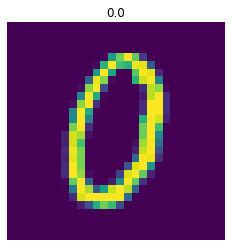

In [10]:
# visualize one of the images in data set
plt.imshow(features_numpy[5].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[5]))
plt.savefig('graph.png')
plt.show()

# 3. Create CNN Model

In [11]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# 4. Instantiate Model Class

In [12]:
# Create ANN
model = CNNModel()

# 5. Instantiate Loss (Cross Entropy Loss)  

In [13]:
error = nn.CrossEntropyLoss()

# 6. Instantiate Optimizer (SGD Optimizer) 

In [14]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 7. Training the Model

In [15]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.09713523834943771  Accuracy: 96.70237731933594 %
Iteration: 1000  Loss: 0.04761643335223198  Accuracy: 97.67857360839844 %
Iteration: 1500  Loss: 0.029194524511694908  Accuracy: 97.82142639160156 %
Iteration: 2000  Loss: 0.014746414497494698  Accuracy: 98.16666412353516 %
Iteration: 2500  Loss: 0.013175304047763348  Accuracy: 98.23809814453125 %
Iteration: 3000  Loss: 0.02037743106484413  Accuracy: 98.45237731933594 %
Iteration: 3500  Loss: 0.02628687396645546  Accuracy: 98.3452377319336 %
Iteration: 4000  Loss: 0.0066251917742192745  Accuracy: 98.48809814453125 %
Iteration: 4500  Loss: 0.017748629674315453  Accuracy: 98.54762268066406 %
Iteration: 5000  Loss: 0.004302043933421373  Accuracy: 98.67857360839844 %
Iteration: 5500  Loss: 0.022751271724700928  Accuracy: 98.63095092773438 %
Iteration: 6000  Loss: 0.013140934519469738  Accuracy: 98.32142639160156 %
Iteration: 6500  Loss: 0.008146298117935658  Accuracy: 98.48809814453125 %
Iteration: 7000  Loss: 0.01203

# 8. Visualization

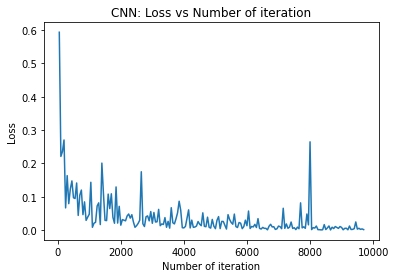

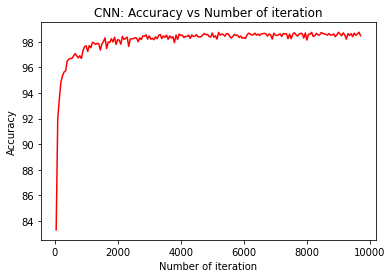

In [16]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

## While loss decreasing, accuracy is increasing. That refers to model is learning!